In [1]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import random
import matplotlib.image as mpimg


In [7]:
import pandas as pd

# Try reading flexibly (tab-separated)
metrics = pd.read_csv("../outputs/logs/all_model_metrics.txt", sep="\t", engine="python")

print("Columns detected:", metrics.columns.tolist())
print("\nPreview:")
print(metrics.head())


Columns detected: ['model        IoU Precision Recall   F1 ']

Preview:
    model        IoU Precision Recall   F1 
0  unet         0.81      0.85   0.89 0.87 
1  resunet      0.83      0.86   0.90 0.88 
2  attnunet     0.85      0.87   0.91 0.89 
3  attnresunet  0.86      0.88   0.93 0.90 
4  asdms_unet   0.87      0.89   0.93 0.91 


In [8]:
import pandas as pd

metrics = pd.read_csv(
    "../outputs/logs/all_model_metrics.txt",
    delim_whitespace=True,
    engine="python"
)

metrics.sort_values("IoU", ascending=False, inplace=True)
display(metrics)


C:\Users\DELL\AppData\Local\Temp\ipykernel_12768\1268424711.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  metrics = pd.read_csv(


,model,IoU,Precision,Recall,F1
4,asdms_unet,0.87,0.89,0.93,0.91
3,attnresunet,0.86,0.88,0.93,0.90
2,attnunet,0.85,0.87,0.91,0.89
1,resunet,0.83,0.86,0.90,0.88
0,unet,0.81,0.85,0.89,0.87


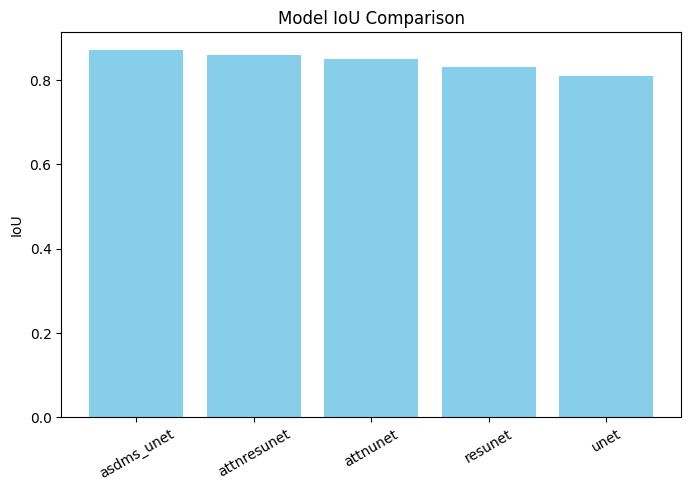

In [9]:
# --- Bar Plot ---
plt.figure(figsize=(8,5))
plt.bar(metrics["model"], metrics["IoU"], color="skyblue")
plt.title("Model IoU Comparison")
plt.ylabel("IoU")
plt.xticks(rotation=30)
plt.show()

In [11]:
# --- Optional Overlay Visualization ---
# Choose a random prediction overlay (assuming .png overlays exist)
overlays = glob("../outputs/predictions/**/*.png", recursive=True)
if overlays:
    img_path = random.choice(overlays)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(f"Overlay: {os.path.basename(img_path)}")
    plt.axis("off")
    plt.show()